# TS1: Síntesis de señales

## Alumno: Felipe Berganza

1) Sintetizar y graficar:

a.Una señal sinusoidal de 2KHz.

b.Misma señal amplificada y desfazada en π/2.

c.Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.

d.Señal anterior recortada al 75% de su amplitud.

e.Una señal cuadrada de 4KHz.

f.Un pulso rectangular de 10ms.

g.En cada caso indique tiempo entre muestras, número de muestras y potencia o energía según corresponda.

## 1.a Sintetizar y graficar: Una señal sinusoidal de 2KHz.

Tiempo entre muestras: 0.0227 ms
Número de muestras: 441

1. Señal sinusoidal de 2kHz - Potencia: 0.5000


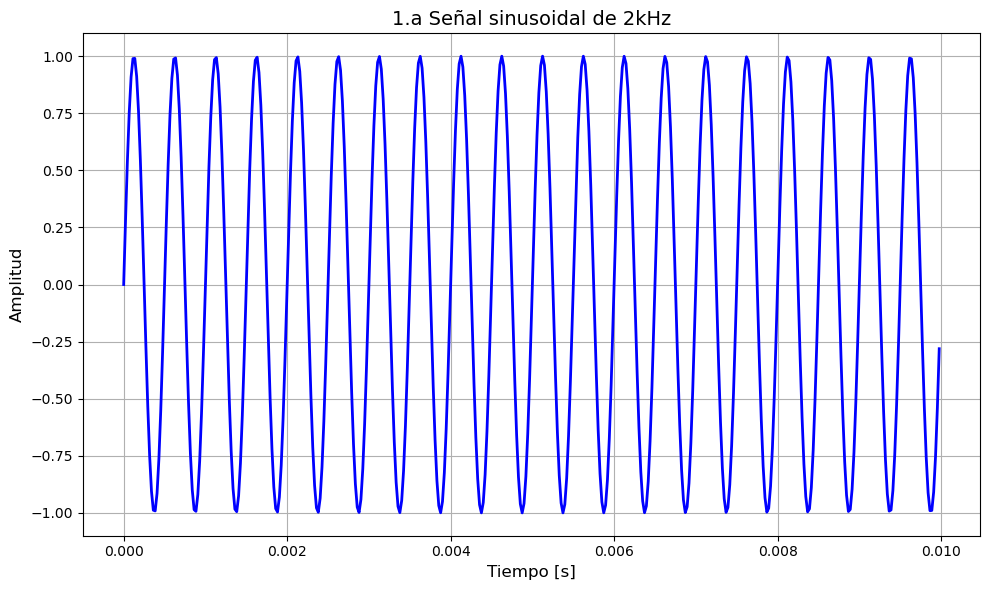

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import psutil

# Parámetros generales
fs = 44100  # Frecuencia de muestreo [Hz]
t_total = 0.01  # Tiempo total de simulación [s] (10 ms)
nn = int(fs * t_total)  # Número de muestras
Ts = 1/fs  # Tiempo entre muestras [s]

print(f"Tiempo entre muestras: {Ts*1000:.4f} ms")
print(f"Número de muestras: {nn}")

# Frecuencia fundamental
f1 = 2000  # 2 kHz

# 1.a Defino la funcion seno
def funcion_sen(vmax, dc, ff, ph, nn, fs):
    t_total = nn / fs  # Tiempo total de muestreo
    tt = np.linspace(0, t_total, nn, endpoint=False)  # Vector de tiempo
    
    # Creo la señal senoidal
    xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc
    
    return tt, xx

# 1.a Señal sinusoidal de 2kHz
tt, xx1 = funcion_sen(vmax=1, dc=0, ff=f1, ph=0, nn=nn, fs=fs)
potencia_xx1 = np.mean(xx1**2)
print(f"\n1. Señal sinusoidal de 2kHz - Potencia: {potencia_xx1:.4f}")

# 1.a Señal sinusoidal de 2kHz
plt.figure(figsize=(10, 6))
plt.plot(tt[:1000], xx1[:1000], 'b-', linewidth=2)
plt.title('1.a Señal sinusoidal de 2kHz', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



En este punto se creo una funcion seno utilizando la libre de numpy, esta misma esta muestrada en un rango acorde para poder visualizar la funcion de forma detallada. 

## 1.b Misma señal amplificada y desfazada en π/2.

2. Señal amplificada y desfasada - Potencia: 2.0000


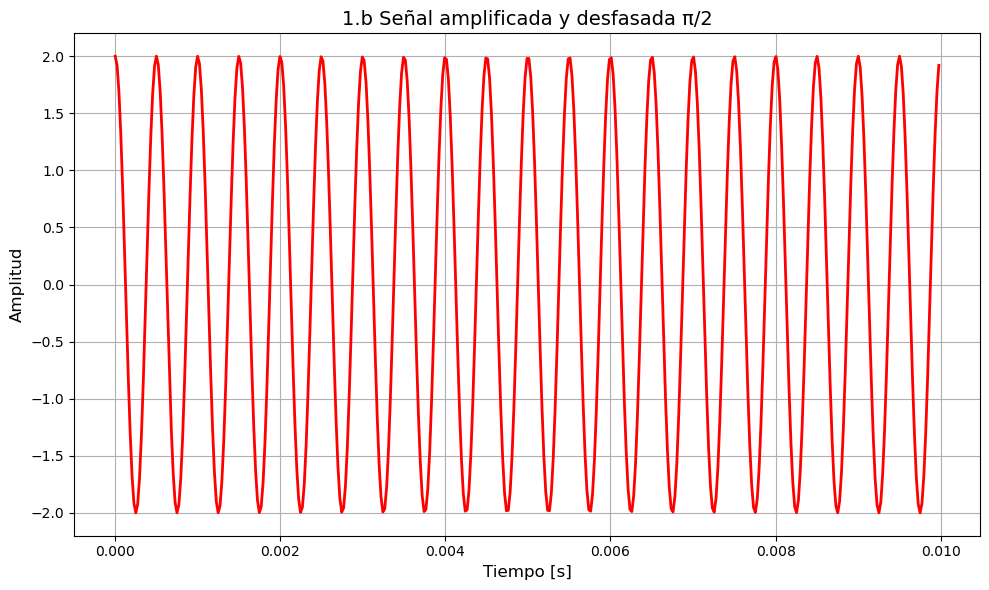

In [8]:
# 1.b Señal amplificada con un factor de 2 y desfasada en π/2 
tt, xx2 = funcion_sen(vmax=2, dc=0, ff=f1, ph=np.pi/2, nn=nn, fs=fs)
potencia_xx2 = np.mean(xx2**2)
print(f"2. Señal amplificada y desfasada - Potencia: {potencia_xx2:.4f}")

# 1.b Señal amplificada y desfasada
plt.figure(figsize=(10, 6))
plt.plot(tt[:1000], xx2[:1000], 'r-', linewidth=2)
plt.title('1.b Señal amplificada y desfasada π/2', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



## 1.c Señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.

La modulación en amplitud (AM) es una técnica donde la amplitud de una señal de alta frecuencia (portadora) varía en proporción a la amplitud de una señal de baja frecuencia (moduladora).

3. Señal modulada AM - Potencia: 0.2500


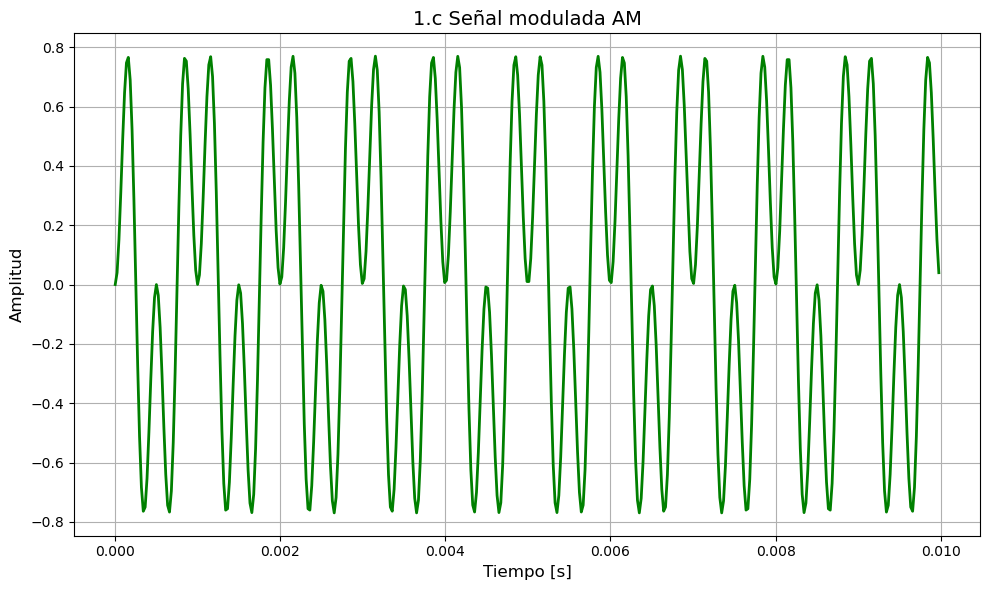

In [17]:
# 1.c Señal modulada en amplitud    
# Creo la señal moduladora (mitad de frecuencia)
tt, portadora = funcion_sen(vmax=1, dc=0, ff=f1/2, ph=0, nn=nn, fs=fs)
modulacion = xx1 * portadora
potencia_modulacion = np.mean(modulacion**2)
print(f"3. Señal modulada AM - Potencia: {potencia_modulacion:.4f}")

# 1.c Señal modulada AM
plt.figure(figsize=(10, 6))
plt.plot(tt[:2000], modulacion[:2000], 'g-', linewidth=2)
plt.title('1.c Señal modulada AM', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## 1.d Señal original recortada al 75% de su amplitud.

4. Señal recortada al 75% - Potencia: 0.4455


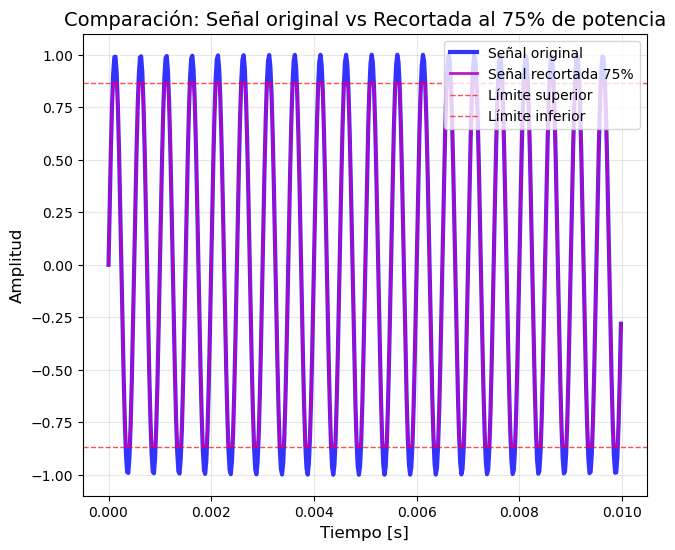

In [15]:
# 1.d Señal recortada al 75% de su potencia
# Calculo amplitud para 75% de potencia
amplitud_pico_original = np.max(np.abs(xx1))
potencia_original = (amplitud_pico_original**2) / 2
amplitud_pico_deseada = np.sqrt(2 * 0.75 * potencia_original)

# Recorto la señal
senal_recortada = np.clip(xx1, -amplitud_pico_deseada, amplitud_pico_deseada)
potencia_recortada = np.mean(senal_recortada**2)
print(f"4. Señal recortada al 75% - Potencia: {potencia_recortada:.4f}")


plt.figure(figsize=(16, 6))  
plt.subplot(1, 2, 2)
plt.plot(tt[:1000], xx1[:1000], 'b-', linewidth=3, label='Señal original', alpha=0.8)
plt.plot(tt[:1000], senal_recortada[:1000], 'm-', linewidth=2, label='Señal recortada 75%', alpha=0.9)
plt.axhline(y=amplitud_pico_deseada, color='r', linestyle='--', alpha=0.7, linewidth=1, label='Límite superior')
plt.axhline(y=-amplitud_pico_deseada, color='r', linestyle='--', alpha=0.7, linewidth=1, label='Límite inferior')
plt.title('Comparación: Señal original vs Recortada al 75% de potencia', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)

 ## 1.e Sintetizar y graficar Una señal cuadrada de 4KHz.

5. Onda cuadrada 4kHz - Potencia: 1.0000


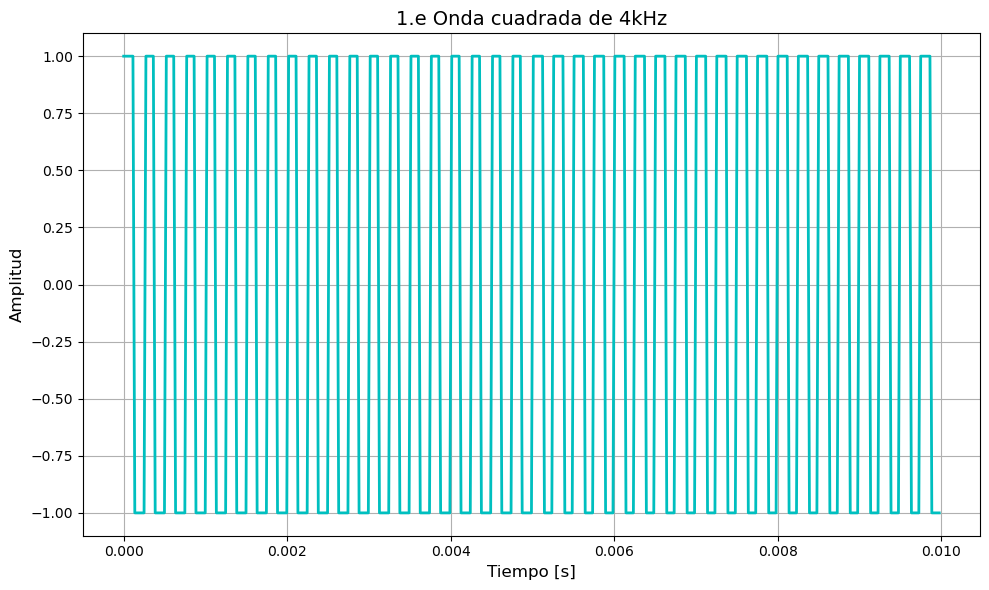

In [18]:
# 1.e Función para crear una onda cuadrada de 4kHz
def funcion_cuadrada(vmax, dc, ff, nn, fs):
    t_total = nn / fs
    tt = np.linspace(0, t_total, nn, endpoint=False)
    
    periodo = 1 / ff
    estado = (tt % periodo) < (0.5 * periodo)  # ciclo de trabajo de 50%
    xx = np.where(estado, vmax, -vmax) + dc
    
    return tt, xx

# Creo la onda cuadrada de 4kHz
tt, xx4 = funcion_cuadrada(vmax=1, dc=0, ff=4000, nn=nn, fs=fs)
potencia_xx4 = np.mean(xx4**2)
print(f"5. Onda cuadrada 4kHz - Potencia: {potencia_xx4:.4f}")

# 1.e Onda cuadrada de 4kHz
plt.figure(figsize=(10, 6))
plt.plot(tt[:2000], xx4[:2000], 'c-', linewidth=2)
plt.title('1.e Onda cuadrada de 4kHz', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## 1.f Sintetizar y graficar un pulso rectangular de 10ms.

6. Pulso rectangular 10ms - Potencia: 0.3333


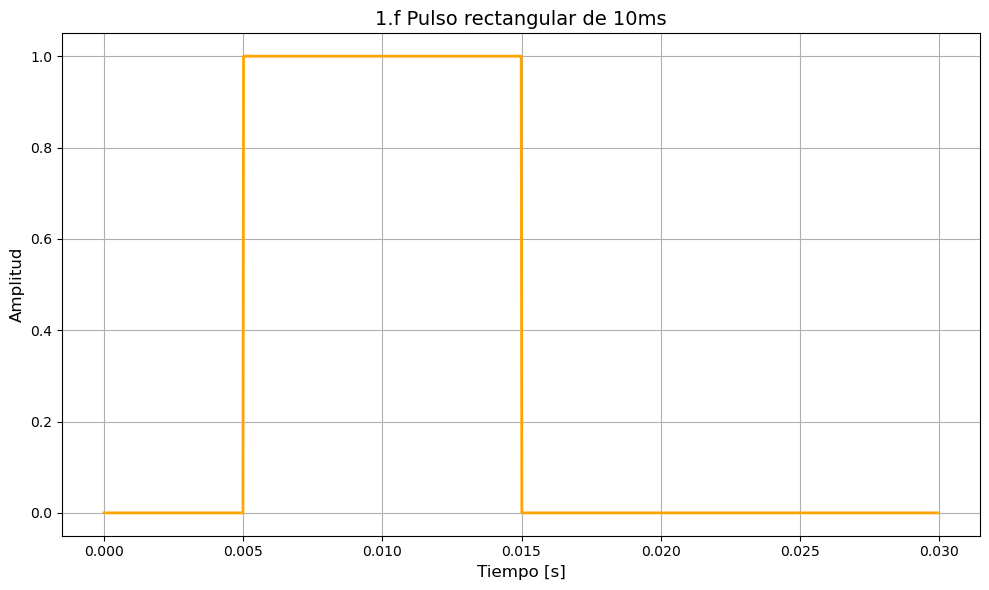

In [19]:
# 1.f Función para crear un pulso rectangular de 10ms
def pulso_rectangular(amplitud, duracion_total, fs, duracion_pulso, inicio=0):
    nn = int(fs * duracion_total)
    tt = np.linspace(0, duracion_total, nn, endpoint=False)
    
    pulso = np.zeros_like(tt)
    mask_pulso = (tt >= inicio) & (tt <= inicio + duracion_pulso)
    pulso[mask_pulso] = amplitud
    
    return tt, pulso

# Genero el pulso de 10 ms con la misma frecuencia de muestreo
tt_pulso, pulso_10ms = pulso_rectangular(amplitud=1, duracion_total=0.03, fs=fs, 
                                        duracion_pulso=0.01, inicio=0.005)
potencia_pulso = np.mean(pulso_10ms**2)
print(f"6. Pulso rectangular 10ms - Potencia: {potencia_pulso:.4f}")

# 1.6 Pulso rectangular de 10ms
plt.figure(figsize=(10, 6))
plt.plot(tt_pulso, pulso_10ms, 'orange', linewidth=2)
plt.title('1.f Pulso rectangular de 10ms', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# 2) Verificar ortogonalidad entre la primera señal y las demás.

La ortogonalidad entre dos funciones es una generalización del concepto de perpendicularidad entre vectores. Dos funciones se consideran ortogonales si su producto interno es cero.

In [22]:
def verificar_ortogonales(senal1, senal2, umbral=1e-10, verbose=True):
    if len(senal1) != len(senal2):
        if verbose:
            print("Tamaños diferentes")
        return False
    
    producto = np.dot(senal1.flatten(), senal2.flatten())
    ortogonal = abs(producto) < umbral
    
    if verbose:
        if ortogonal:
            print(f"SÍ son ortogonales ")
        else:
            print(f"NO son ortogonales ")
    
    return ortogonal

print("\n=== VERIFICACIÓN DE ORTOGONALIDAD ===")
print("1. xx1 vs xx1:")
verificar_ortogonales(xx1, xx1)

print("\n2. xx1 vs xx2 (seno y coseno):")
verificar_ortogonales(xx1, xx2)

print("\n3. xx1 vs modulación:")
min_len = min(len(xx1), len(modulacion))
verificar_ortogonales(xx1[:min_len], modulacion[:min_len])

print("\n4. xx1 vs señal recortada:")
verificar_ortogonales(xx1, senal_recortada)

print("\n5. xx1 vs xx4 (onda cuadrada 4kHz):")
min_len = min(len(xx1), len(xx4))
verificar_ortogonales(xx1[:min_len], xx4[:min_len])

print("\n6. xx1 vs pulso 10ms:")
pulso_resized = np.interp(np.linspace(0, 1, len(xx1)), 
                         np.linspace(0, 1, len(pulso_10ms)), 
                         pulso_10ms.flatten())
verificar_ortogonales(xx1, pulso_resized)


=== VERIFICACIÓN DE ORTOGONALIDAD ===
1. xx1 vs xx1:
NO son ortogonales 

2. xx1 vs xx2 (seno y coseno):
SÍ son ortogonales 

3. xx1 vs modulación:
SÍ son ortogonales 

4. xx1 vs señal recortada:
NO son ortogonales 

5. xx1 vs xx4 (onda cuadrada 4kHz):
NO son ortogonales 

6. xx1 vs pulso 10ms:
NO son ortogonales 


np.False_

# 3) Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás.

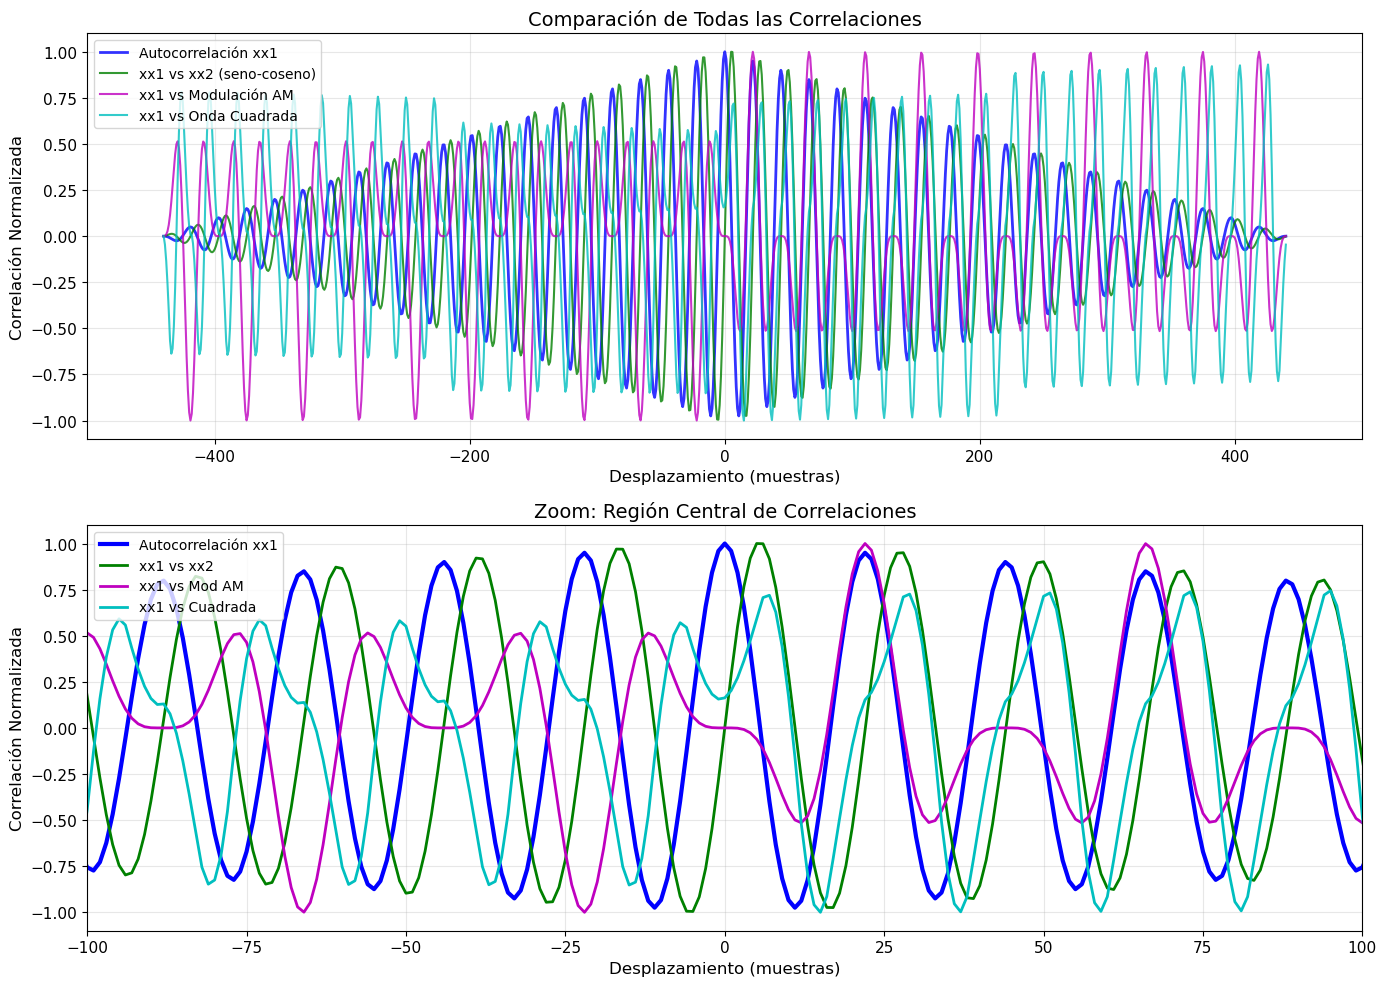

In [29]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig

def calcular_correlacion(senal1, senal2=None, metodo='numpy'):
    # Asegurar que son arrays 1D
    s1 = senal1.flatten()
    
    if senal2 is None:
        # AUTOCORRELACIÓN
        s2 = s1
        if metodo == 'scipy':
            correlacion = sig.correlate(s1, s1, mode='full', method='auto')
        else:
            correlacion = np.correlate(s1, s1, mode='full')
    else:
        # CORRELACIÓN CRUZADA
        s2 = senal2.flatten()
        min_len = min(len(s1), len(s2))
        if metodo == 'scipy':
            correlacion = sig.correlate(s1[:min_len], s2[:min_len], mode='full', method='auto')
        else:
            correlacion = np.correlate(s1[:min_len], s2[:min_len], mode='full')
    
    # Calcular lags correctamente
    N = len(s1) if senal2 is None else min_len
    lags = np.arange(-N + 1, N)
    
    # Normalización adecuada
    if metodo == 'scipy':
        # scipy ya normaliza mejor internamente con method='auto'
        correlacion_norm = correlacion / np.max(np.abs(correlacion))
    else:
        # Normalización manual más robusta
        norm_factor = np.sqrt(np.sum(s1**2) * np.sum(s2**2)) if senal2 is not None else np.sum(s1**2)
        correlacion_norm = correlacion / norm_factor if norm_factor != 0 else correlacion
    
    return correlacion_norm, lags

# Versión alternativa con scipy 
def calcular_correlacion_scipy(senal1, senal2=None):
    s1 = senal1.flatten()
    
    if senal2 is None:
        # Autocorrelación
        correlacion = sig.correlate(s1, s1, mode='full', method='auto')
        lags = sig.correlation_lags(len(s1), len(s1), mode='full')
    else:
        # Correlación cruzada
        s2 = senal2.flatten()
        min_len = min(len(s1), len(s2))
        correlacion = sig.correlate(s1[:min_len], s2[:min_len], mode='full', method='auto')
        lags = sig.correlation_lags(min_len, min_len, mode='full')
    
    # Normalizar
    correlacion_norm = correlacion / np.max(np.abs(correlacion))
    
    return correlacion_norm, lags

# Autocorrelación de xx1
autocorr_xx1, lags_auto = calcular_correlacion_scipy(xx1)

# Correlación cruzada xx1 vs xx2
corr_xx1_xx2, lags_cross1 = calcular_correlacion_scipy(xx1, xx2)
max_corr1 = np.max(corr_xx1_xx2)
max_lag1 = lags_cross1[np.argmax(corr_xx1_xx2)]

# Correlación cruzada xx1 vs modulación
corr_xx1_mod, lags_cross2 = calcular_correlacion_scipy(xx1, modulacion)
max_corr2 = np.max(corr_xx1_mod)
max_lag2 = lags_cross2[np.argmax(corr_xx1_mod)]


# Correlación cruzada xx1 vs xx4 (onda cuadrada)
corr_xx1_xx4, lags_cross3 = calcular_correlacion_scipy(xx1, xx4)
max_corr3 = np.max(corr_xx1_xx4)
max_lag3 = lags_cross3[np.argmax(corr_xx1_xx4)]

# GRÁFICO COMPARATIVO 
plt.figure(figsize=(14, 10))

# Todas las correlaciones en un mismo gráfico para comparar
plt.subplot(2, 1, 1)
plt.plot(lags_auto, autocorr_xx1, 'b-', label='Autocorrelación xx1', linewidth=2, alpha=0.8)
plt.plot(lags_cross1, corr_xx1_xx2, 'g-', label='xx1 vs xx2 (seno-coseno)', linewidth=1.5, alpha=0.8)
plt.plot(lags_cross2, corr_xx1_mod, 'm-', label='xx1 vs Modulación AM', linewidth=1.5, alpha=0.8)
plt.plot(lags_cross3, corr_xx1_xx4, 'c-', label='xx1 vs Onda Cuadrada', linewidth=1.5, alpha=0.8)

plt.title('Comparación de Todas las Correlaciones', fontsize=14)
plt.xlabel('Desplazamiento (muestras)', fontsize=12)
plt.ylabel('Correlación Normalizada', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(-500, 500)  # Zoom en región central

# Zoom en la región de máximo interés
plt.subplot(2, 1, 2)
plt.plot(lags_auto, autocorr_xx1, 'b-', label='Autocorrelación xx1', linewidth=3)
plt.plot(lags_cross1, corr_xx1_xx2, 'g-', label='xx1 vs xx2', linewidth=2)
plt.plot(lags_cross2, corr_xx1_mod, 'm-', label='xx1 vs Mod AM', linewidth=2)
plt.plot(lags_cross3, corr_xx1_xx4, 'c-', label='xx1 vs Cuadrada', linewidth=2)

plt.title('Zoom: Región Central de Correlaciones', fontsize=14)
plt.xlabel('Desplazamiento (muestras)', fontsize=12)
plt.ylabel('Correlación Normalizada', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(-100, 100)  # Zoom muy cercano

plt.tight_layout()
plt.show()

# 4) Demostrar propiedad trigonometrica



=== DEMOSTRACIÓN PROPIEDAD TRIGONOMÉTRICA ===
2⋅sin(α)⋅sin(β) = cos(α-β) - cos(α+β)
Diferencia máxima entre ambos lados: 7.22e-15
La igualdad se cumple


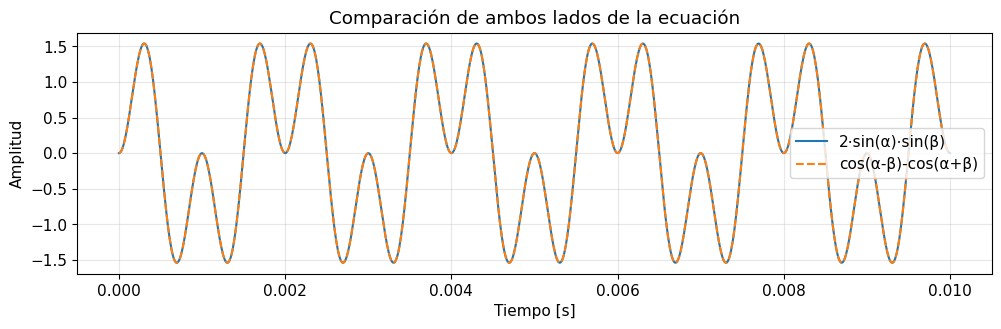

In [32]:
print("\n=== DEMOSTRACIÓN PROPIEDAD TRIGONOMÉTRICA ===")
print("2⋅sin(α)⋅sin(β) = cos(α-β) - cos(α+β)")

# Definir parámetros
frecuencia = 1000  # 1 kHz
t = np.linspace(0, 0.01, 1000)  # 10 ms
alpha = 2 * np.pi * frecuencia * t
beta = 2 * np.pi * frecuencia/2 * t  # β es la mitad de α

# Calcular ambos lados de la ecuación
lado_izq = 2 * np.sin(alpha) * np.sin(beta)
lado_der = np.cos(alpha - beta) - np.cos(alpha + beta)

# Verificar igualdad
diferencia = np.max(np.abs(lado_izq - lado_der))
print(f"Diferencia máxima entre ambos lados: {diferencia:.2e}")

if diferencia < 1e-10:
    print("La igualdad se cumple")
else:
    print("La igualdad NO se cumple")

# Graficar
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, lado_izq, label='2⋅sin(α)⋅sin(β)')
plt.plot(t, lado_der, '--', label='cos(α-β)-cos(α+β)')
plt.title('Comparación de ambos lados de la ecuación')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Conclusion 

En el TS1 tuve mi primero acercamiento a la generacion de senales via python por lo cual tuve que acudir a una IA en la implementacion de codigo y por consecuencia graficamente tambien. En cuanto a lo aprendido en lo que consta de temas teoricos, luego de investigar por mi cuenta, aprendi sobre tiempo entre muestreos, frecuencias de muestreo y numero de muestras. Esto ultimo es la primer aproximacion que tengo y pude aprenderlo y llevarlo a cabo.  